In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import scipy.constants as spc
import scipy as sc
import numpy as np
import matplotlib.pylab as plt

In [2]:
file = dataio.I3File('/data/p-one/akatil/step_3_medium_water/Custom/NuTau_NuE_20Events/step_3_713_medium_water_custom_mDOM.i3.gz')

In [3]:
gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
geoMap = geometry.omgeo
print('loaded geometry')

loaded geometry


In [4]:
maxMCPE_e = 0
maxMCPE_t = 0 

for frame in file:
    print('new Frame')
    mctree = frame["I3MCTree"]
    primary = mctree.primaries
    lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
    #tauDecayProd = dataclasses.I3MCTree.get_daughters(mctree, tau.id)
    #daughterTauPos = tau.pos
    #daughterTauEnergies = tau.energy

    mcpeMap = frame['MCPESeriesMap']

    print('Finding OM Positions and time residuals')


    for omkey in mcpeMap.keys():
        oKey = geoMap.get(omkey)
        domPos = oKey.position

        mcpeList = mcpeMap[omkey]
        timeList = [mcpe.time for mcpe in mcpeList]
        timeList = np.array(timeList)
        #timeRes = timeList - timeTaken
        if lepton.type == 11 or lepton.type == -11:
            if len(timeList) > maxMCPE_e and len(timeList) < 900:
                #print('-----TIME LIST ------', len(timeList))
                maxMCPE_e = len(timeList)
                timeArrival_e = timeList
        if lepton.type == 15 or lepton.type == -15:
            if len(timeList) > maxMCPE_t and len(timeList) < 900:
                #print('-----TIME LIST ------', len(timeList))
                maxMCPE_t = len(timeList)
                timeArrival_t = timeList

new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals
new Frame
Finding OM Positions and time residuals


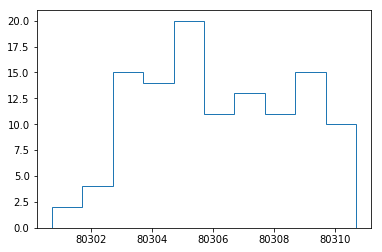

In [17]:
bins = np.arange(min(timeArrival_t), min(timeArrival_t)+11, 1)
num, bin_edges, _ = plt.hist(timeArrival_t, bins=bins, histtype='step')

In [18]:
import scipy

def gaussian(x, pos, wid, amp):
    y = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    return y

def log_likelihood(theta, n, x):
    pos, wid, amp = theta
    model =  amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    return np.sum(L)
    
'''
def log_likelihood(theta, x, y):
    pos, wid, amp, log_f = theta
    yerr = 0
    model = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))
'''

'\ndef log_likelihood(theta, x, y):\n    pos, wid, amp, log_f = theta\n    yerr = 0\n    model = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)\n    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)\n    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))\n'

In [19]:
from scipy.optimize import minimize

nll = lambda *args: -log_likelihood(*args)
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
print(bin_centers)
initial = np.array([(bin_centers[0]+40)/2, 20, max(num)])
#bnds = ((min(bin_centers), max(bin_centers)), (0, 40), (0, max(num)))
soln = minimize(nll, initial, args=(num, bin_centers), method='Powell')

[80301.20142043 80302.20142043 80303.20142043 80304.20142043
 80305.20142043 80306.20142043 80307.20142043 80308.20142043
 80309.20142043 80310.20142043]


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [15]:
x = np.linspace(min(bin_centers)-10, max(bin_centers)+10, 1000)
y = gaussian(x, soln.x[0], soln.x[1], soln.x[2])

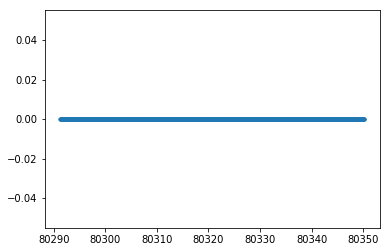

In [16]:
plt.plot(x, y, '.')

In [95]:

popt, pcov = scipy.optimize.curve_fit(gaussian, xdata=bin_centers, ydata=num,
                                      p0 = (80290, 20, 20),  sigma=np.sqrt(num), absolute_sigma=True)

In [96]:
popt

array([8.029e+04, 2.000e+01, 2.000e+01])

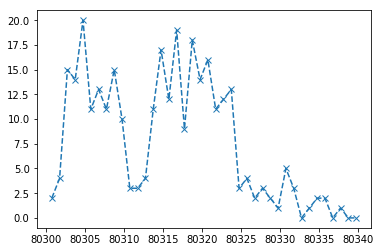

In [12]:
plt.plot(bin_edges[:-1], num, '--x')

In [16]:
sc.signal.find_peaks_cwt?

In [18]:
timeArrival_t[173]

80313.08465242606